# About dataset:
This is also an automation project in which data is scraped every day at 4am UTC on 8 major categories. This dataset is expected to have a monthly update, thus the data collected daily will be merged into a single monthly csv file. One may expect the value of the dataset to continuously grow through time.

- importing the impotant functions for our data set and data set itself

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("D:\Data Science\python\project\google news.csv")

In [4]:
df.isnull().sum()

Title        0
Publisher    0
DateTime     0
Link         0
Category     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51302 entries, 0 to 51301
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      51302 non-null  object
 1   Publisher  51302 non-null  object
 2   DateTime   51302 non-null  object
 3   Link       51302 non-null  object
 4   Category   51302 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


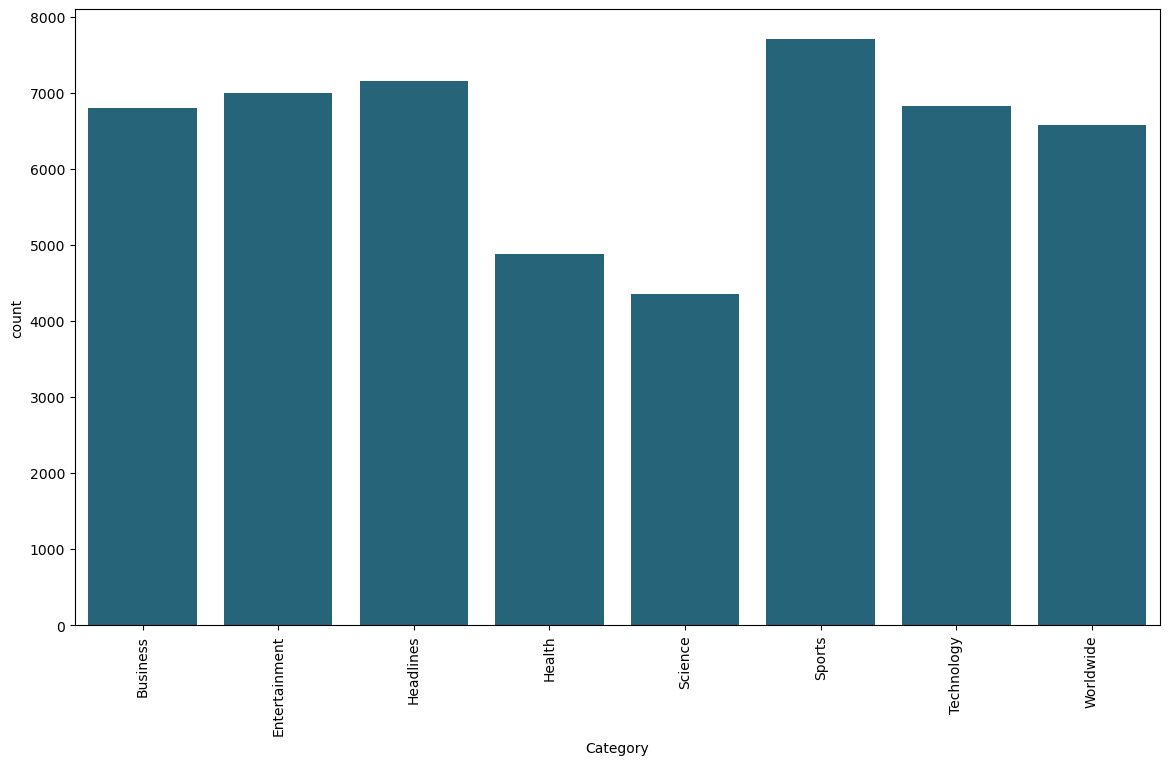

In [6]:
plt.figure(figsize=(14,8))
sns.countplot(x='Category',data=df,color='#176B87')
plt.xticks(rotation=90)
plt.show()


In [7]:
df.head()

,Title,Publisher,DateTime,Link,Category
0,"Chainlink (LINK) Falters, Hedera (HBAR) Wobble...",Analytics Insight,2023-08-30T06:54:49Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
1,Funds punished for owning too few Nvidia share...,ZAWYA,2023-08-30T07:15:59Z,https://news.google.com/articles/CBMigwFodHRwc...,Business
2,Crude oil prices stalled as hedge funds sold: ...,ZAWYA,2023-08-30T07:31:31Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
3,Grayscale's Bitcoin Win Is Still Only Half the...,Bloomberg,2023-08-30T10:38:40Z,https://news.google.com/articles/CBMib2h0dHBzO...,Business
4,"I'm a Home Shopping Editor, and These Are the ...",Better Homes & Gardens,2023-08-30T11:00:00Z,https://news.google.com/articles/CBMiPWh0dHBzO...,Business


In [8]:
x=df['Title']+" "+df["Publisher"]
y=df["Category"]

In [9]:
y

0         Business
1         Business
2         Business
3         Business
4         Business
           ...    
51297    Worldwide
51298    Worldwide
51299    Worldwide
51300    Worldwide
51301    Worldwide
Name: Category, Length: 51302, dtype: object

In [10]:
x=x.str.lower()

In [11]:
from nltk.corpus import stopwords
import string
abcd= stopwords.words("english")
c=string.punctuation

In [12]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in c]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not  in abcd]

In [13]:
x.apply(text_process)

0        [chainlink, link, falters, hedera, hbar, wobbl...
1        [funds, punished, owning, nvidia, shares, stun...
2        [crude, oil, prices, stalled, hedge, funds, so...
3        [grayscales, bitcoin, win, still, half, battle...
4        [im, home, shopping, editor, cantmiss, labor, ...
                               ...                        
51297    [slovakias, election, could, echo, ukraine, he...
51298    [things, know, nobel, prizes, washington, post...
51299    [brief, calm, protests, killing, 2, students, ...
51300    [‘no, one, safe’, france, vows, action, bedbug...
51301    [slovakia, election, polls, open, knifeedge, v...
Length: 51302, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
bow_transformer= CountVectorizer(analyzer=text_process).fit(x)

In [16]:
tdm= bow_transformer.transform(x)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_x,test_x,train_y,test_y=train_test_split(tdm,y,test_size=.2,random_state=22)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [20]:
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [21]:
pred= dt.predict(test_x)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
confusion_matrix(test_y,pred)

array([[ 879,   52,  156,   35,   15,   57,   53,  115],
       [  58, 1014,  113,   29,   12,   70,   31,   57],
       [ 102,   55,  760,   36,   14,   65,   11,  346],
       [  33,   42,   55,  772,   23,   26,   13,   28],
       [  19,   12,   23,   39,  732,   12,   19,   27],
       [  39,   50,   76,    9,    4, 1333,   31,   17],
       [  49,   46,   17,   15,   17,   35, 1204,    7],
       [  47,   19,  395,   13,   20,   20,    5,  783]], dtype=int64)

In [24]:
print(classification_report(test_y,pred)) 

               precision    recall  f1-score   support

     Business       0.72      0.65      0.68      1362
Entertainment       0.79      0.73      0.76      1384
    Headlines       0.48      0.55      0.51      1389
       Health       0.81      0.78      0.80       992
      Science       0.87      0.83      0.85       883
       Sports       0.82      0.86      0.84      1559
   Technology       0.88      0.87      0.87      1390
    Worldwide       0.57      0.60      0.58      1302

     accuracy                           0.73     10261
    macro avg       0.74      0.73      0.74     10261
 weighted avg       0.74      0.73      0.73     10261



In [25]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(train_x,train_y)

MultinomialNB()

In [26]:
pred_nb= nb.predict(test_x)
tab_nb=confusion_matrix(test_y, pred_nb)
tab_nb

array([[1136,   24,   84,   22,   10,   15,   38,   33],
       [  29, 1255,   38,   13,    6,   17,   18,    8],
       [  59,   15,  922,   20,    8,   35,    1,  329],
       [  12,   18,   18,  922,   10,    0,    4,    8],
       [   2,    5,    5,   25,  827,    2,   10,    7],
       [   5,    7,   23,    1,    1, 1518,    0,    4],
       [  48,   15,    8,    9,    9,    2, 1297,    2],
       [  23,   12,  145,    5,   24,    3,    0, 1090]], dtype=int64)

In [27]:
tab_nb.diagonal().sum()*100/tab_nb.sum()

87.38914335834714

In [28]:
print(classification_report(test_y,pred_nb))

               precision    recall  f1-score   support

     Business       0.86      0.83      0.85      1362
Entertainment       0.93      0.91      0.92      1384
    Headlines       0.74      0.66      0.70      1389
       Health       0.91      0.93      0.92       992
      Science       0.92      0.94      0.93       883
       Sports       0.95      0.97      0.96      1559
   Technology       0.95      0.93      0.94      1390
    Worldwide       0.74      0.84      0.78      1302

     accuracy                           0.87     10261
    macro avg       0.88      0.88      0.88     10261
 weighted avg       0.87      0.87      0.87     10261



Model involves classifying different categories, such as Business, Entertainment, Headlines, Health, Science, Sports, Technology, and Worldwide.
- The model  built has achieved an overall accuracy of  87% ,
which is quite good!
- The "Headlines" and "Worldwide" categories have slightly lower scores compared to the others, indicating potential areas for improvement.
- Your project shows promising progress in accurately classifying text into different categories.


# to know about the article check if news has any of these words in respect of Category of the news:

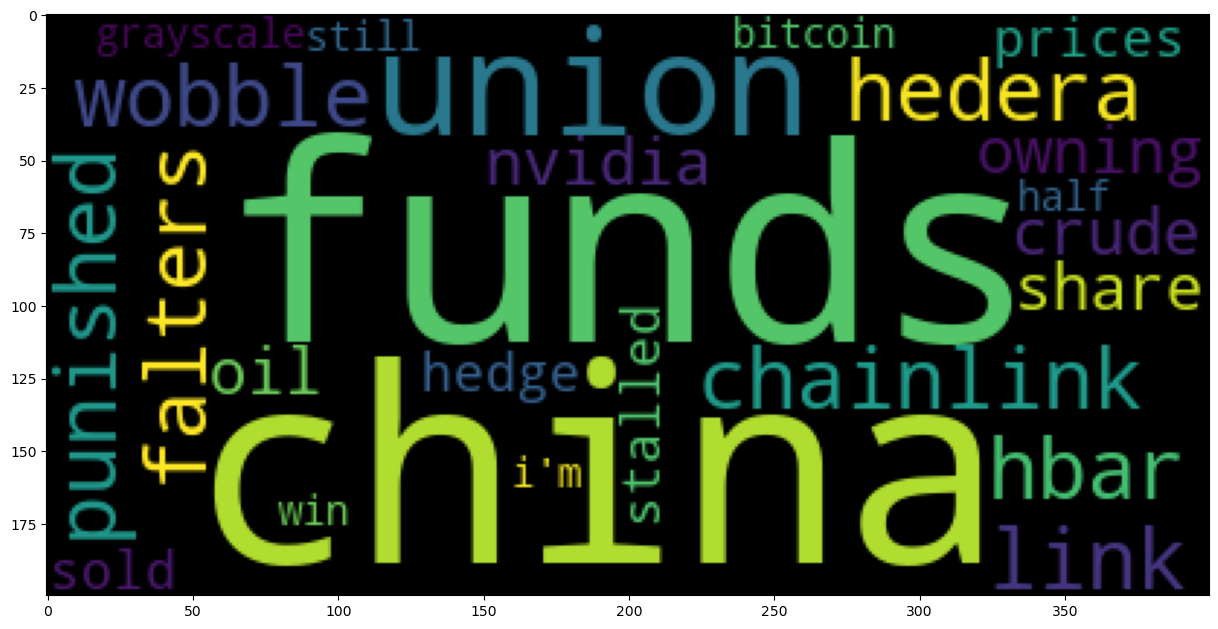

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(x[y=="Business"]))
plt.figure(figsize=(15,10))
plt.imshow(cloud)

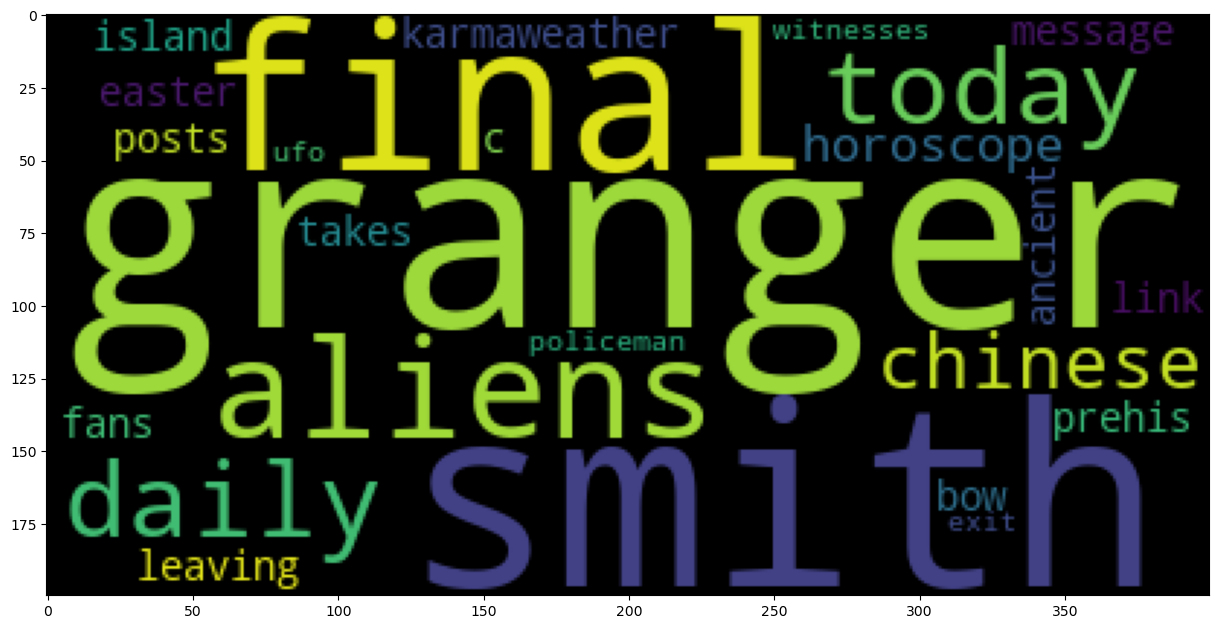

In [30]:
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(x[y=="Entertainment"]))
plt.figure(figsize=(15,10))
plt.imshow(cloud)

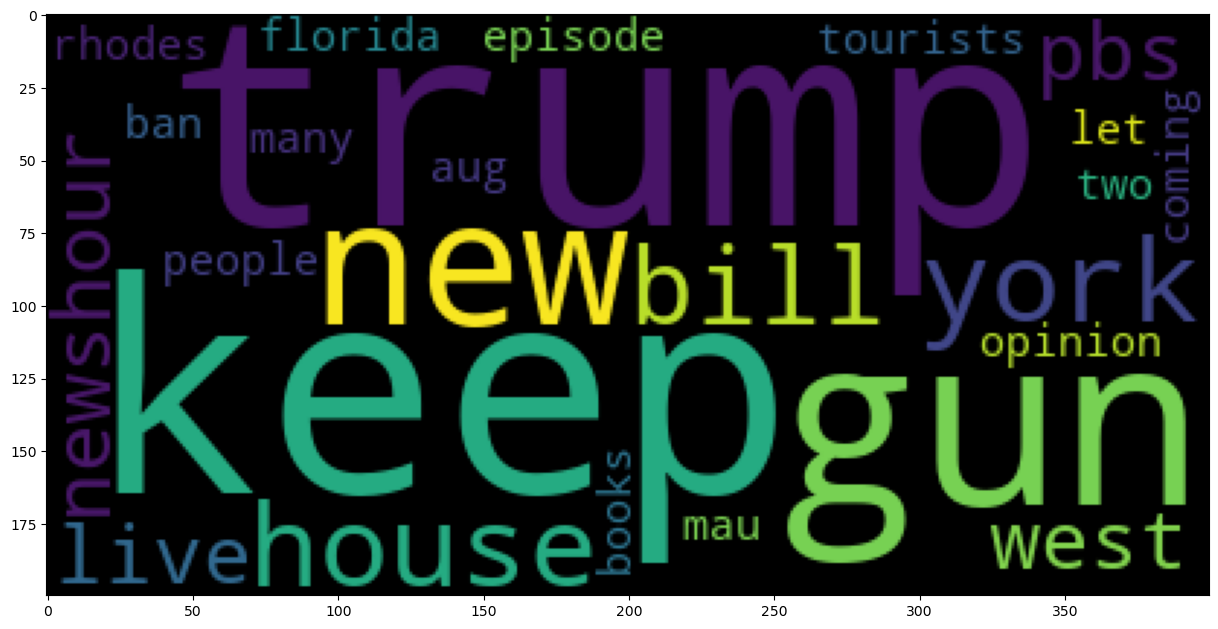

In [31]:
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(x[y=="Headlines"]))
plt.figure(figsize=(15,10))
plt.imshow(cloud)

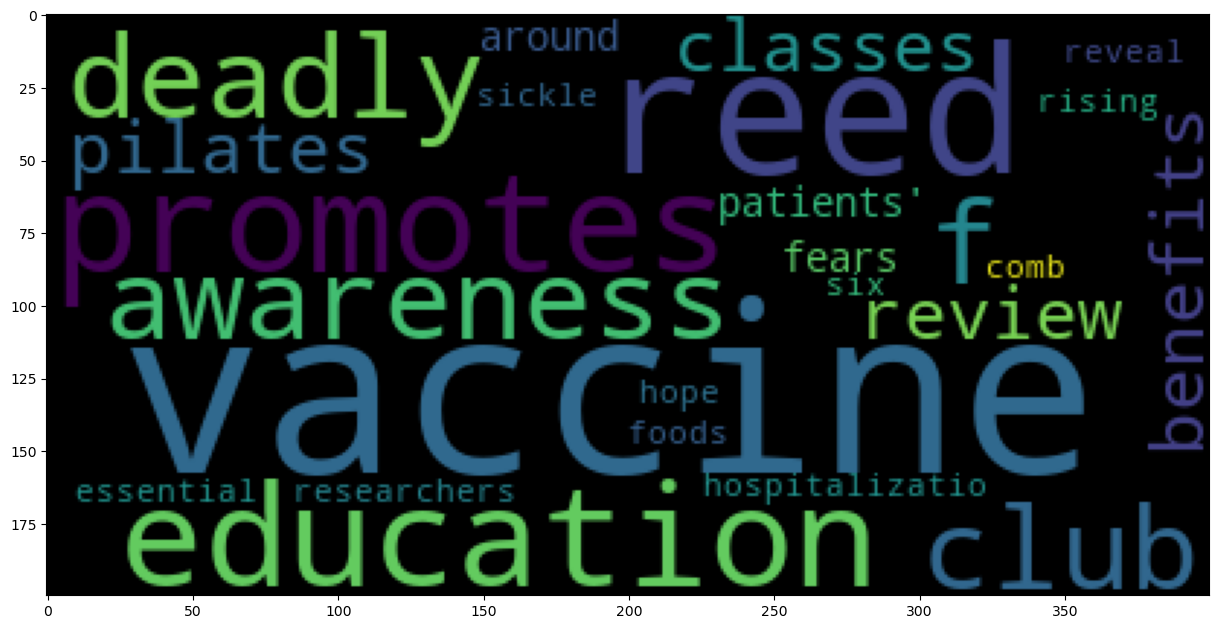

In [32]:

cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(x[y=="Health"]))
plt.figure(figsize=(15,10))
plt.imshow(cloud)

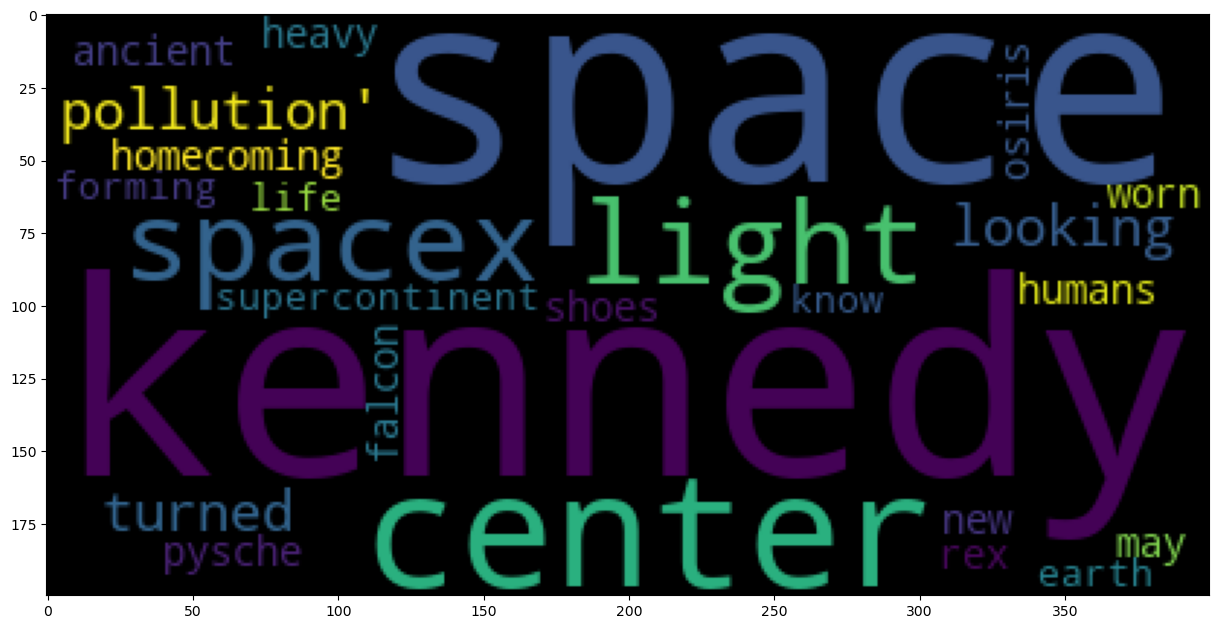

In [33]:
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(x[y=="Science"]))
plt.figure(figsize=(15,10))
plt.imshow(cloud)

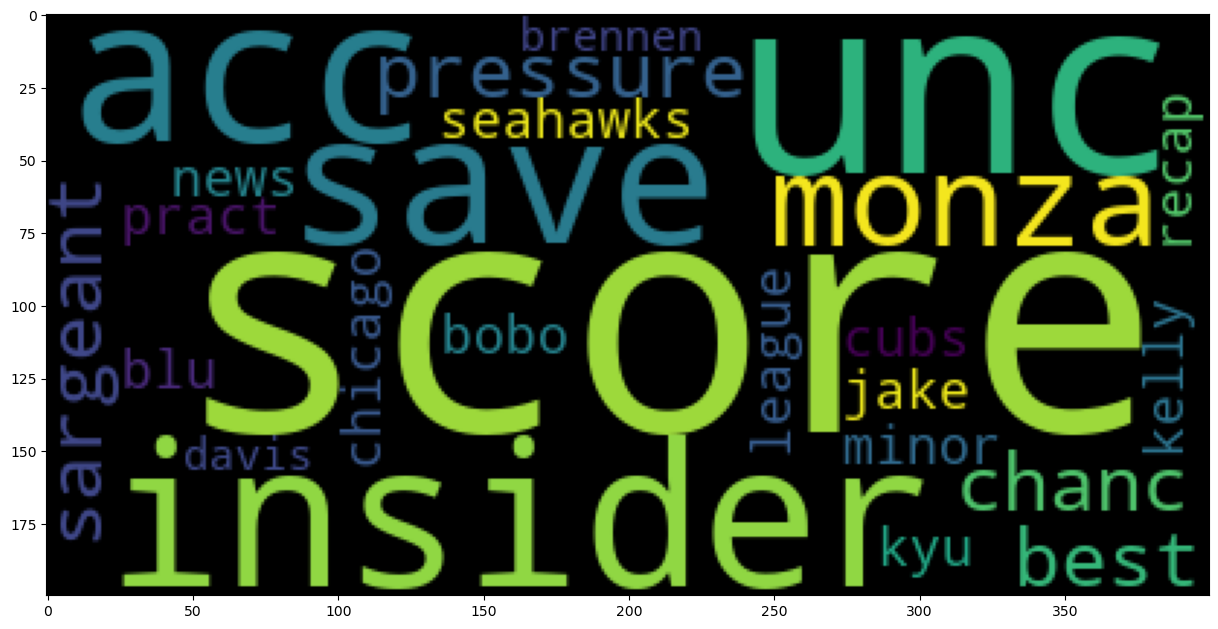

In [34]:
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(x[y=="Sports"]))
plt.figure(figsize=(15,10))
plt.imshow(cloud)

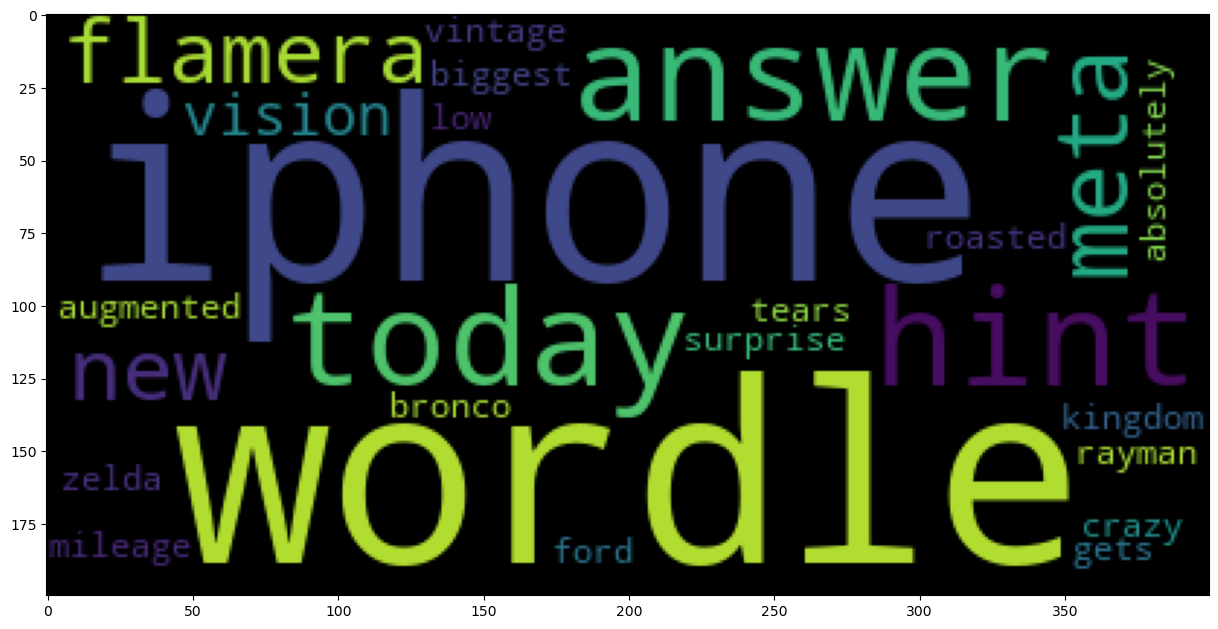

In [35]:
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(x[y=="Technology"]))
plt.figure(figsize=(15,10))
plt.imshow(cloud)

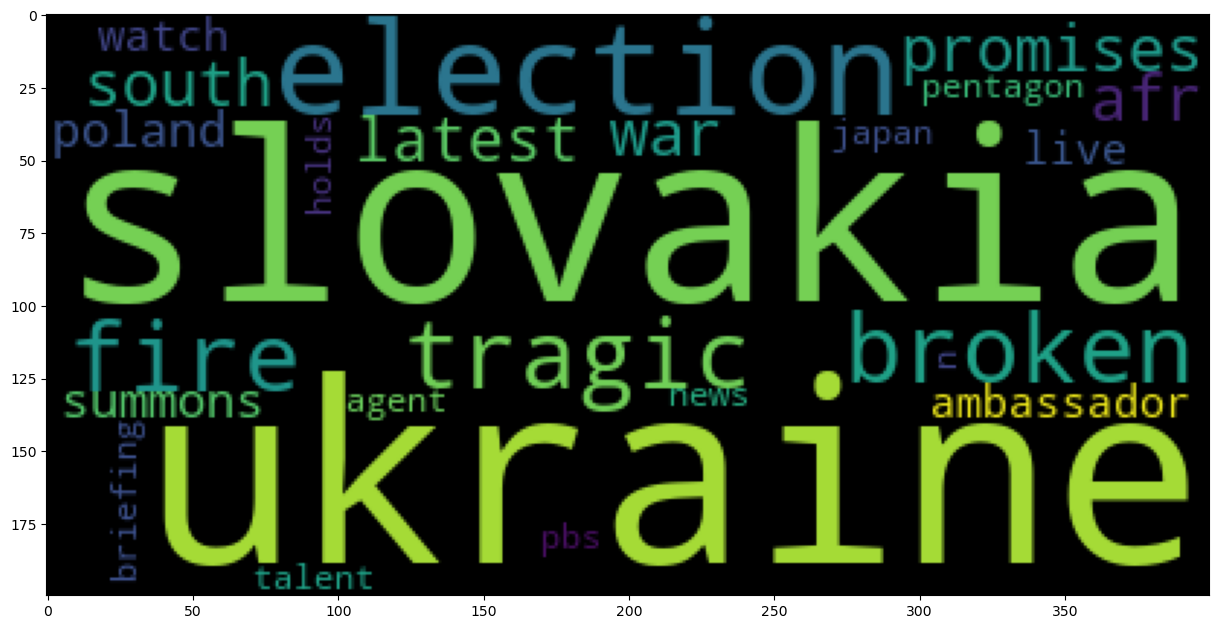

In [36]:
cloud= WordCloud(stopwords = stopwords.words("english"),max_words=25).generate(str(x[y=="Worldwide"]))
plt.figure(figsize=(15,10))
plt.imshow(cloud)